In [2]:
import numpy as np
import igraph as ig
import scipy as sp
import scipy.spatial as spatial
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import cPickle
from Extends import *
import subprocess
import os
from big_clam import BigClam
from big_clam_gamma import BigClamGamma
from Experiments import *
from time import gmtime, strftime
from collections import defaultdict
from cPickle import dump, load
from shutil import copyfile
def time():
    return strftime("%H:%M:%S ", gmtime())
%matplotlib inline 

matplotlib.rc('font', family='Arial', size=16)

In [3]:
seed = 21113222
data_params = {
    'N': None,
     'mut': None,
     'maxk': 50,
     'k': 30,
     'om': 2,
     'muw': None,
     'beta': 2,
     't1': 2,
     't2': 2,
     'on': 0,
     }

In [4]:
def mean(l):
    #lt = [x for x in l if 1 > x ]
    lt = l
    return 1.0 * sum(lt) / len(lt) if len(lt) > 0 else float('nan')

In [5]:
def draw_res(res_path='../data/dumps/models_res_full-dump', k=1, legend=False):
    (models_res, mixing_range, mix, data_params) = load(file(res_path))

    models_ = models_res[0].keys()
    qual_fun_ = models_res[0][models_[0]].keys()
    #qual_fun_ = ('NMI')#, 'MixedModularity', '1-MeanConductance')#.remove("1-MaxConductance")
    print models_, qual_fun_
    #plt.figure(figsize=(14, 40))
    for indx, qual_name in enumerate(qual_fun_):
        plt.subplot(3, 4, 4*indx + k)
        if k==1:
            plt.ylabel('{}'.format(qual_name, data_params['N']))
        if indx==0:
            plt.title('$N={}, \mu_t=\mu_v={}$'.format(data_params['N'], data_params['mut']))
        colors = plt.get_cmap('hsv')(np.linspace(0, 1.0, len(models_) + 1))
        for i, name in enumerate(models_):
            #if name in ['SparseGamma-p1', 'BigClamWeighted-simple', 'BigClam-Zeros-simple', 'BigClam-Zeros', 'SparseGamma-p0.05']:
            #    continue
            plt.plot(mixing_range, [mean(res[name][qual_name]) for res in models_res if len(res) != 0], label=name,
                     color=colors[i] if name != 'groundtruth' else 'k', marker=('.', 'o', 'x', '+')[i%4])
        if indx == 0 and legend:
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        if indx == 2:
             plt.xlabel(u'Доля вершин в пересечении сообществ')
        if indx < 2:
            plt.ylim([0, 1])
    plt.savefig('../plots/{}_{}.eps'.format(data_params['N'], data_params['mut']))

['SparseGamma', 'walktrap', 'NMF', 'BigClam-simple', 'groundtruth', 'COPRA', 'BigClam', 'BigClamWeighted-simple'] ['NMI']
['SparseGamma', 'walktrap', 'NMF', 'BigClam-simple', 'groundtruth', 'COPRA', 'BigClam', 'BigClamWeighted-simple'] ['NMI']


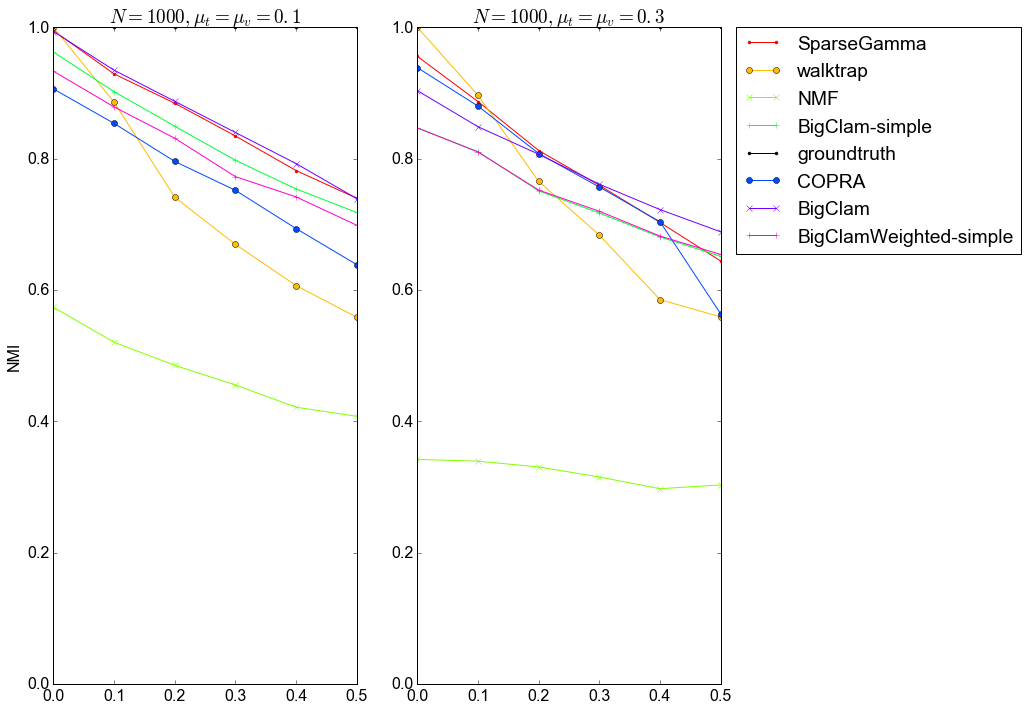

In [8]:
#plt.figure(figsize=(25, 16))
plt.figure(figsize=(25, 40))

data_params['N'] = 1000
data_params['mut'] = 0.1
data_params['muw'] = 0.1
draw_res('../data/dumps/NewGetCommsRule2-dump-{}-{}'.format(data_params['N'], data_params['mut']))

data_params['mut'] = 0.3
data_params['muw'] = 0.3
draw_res('../data/dumps/NewGetCommsRule2-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=2, legend=True)

['SparseGamma', 'walktrap', 'NMF', 'BigClam-simple', 'groundtruth', 'COPRA', 'BigClam', 'BigClamWeighted-simple'] ['NMI']


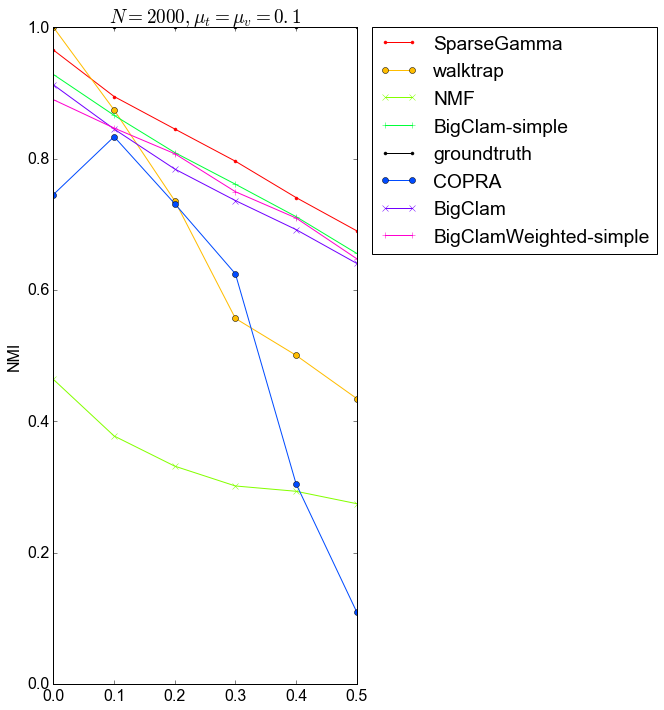

In [10]:
plt.figure(figsize=(25, 40))

data_params['N'] = 2000
data_params['mut'] = 0.1
data_params['muw'] = 0.1
draw_res('../data/dumps/NewGetCommsRule2-dump-{}-{}'.format(data_params['N'], data_params['mut']), legend=True)

#data_params['mut'] = 0.3
#data_params['muw'] = 0.3
#draw_res('../data/dumps/NewGetCommsRule2-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=2, legend=True)

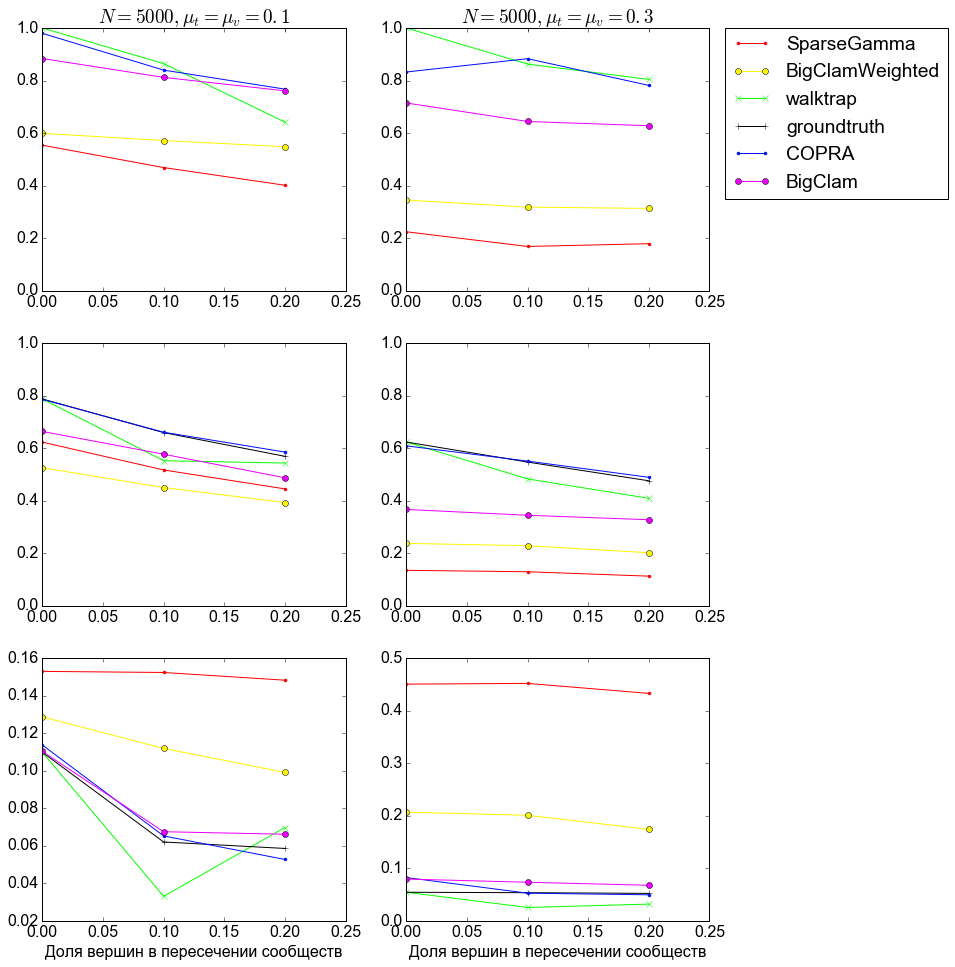

In [10]:
plt.figure(figsize=(25, 16))
data_params['N'] = 5000
data_params['mut'] = 0.1
data_params['muw'] = 0.1
draw_res('../data/dumps/new5000_big_comm-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=3)

data_params['mut'] = 0.3
data_params['muw'] = 0.3
draw_res('../data/dumps/new5000_big_comm-dump-{}-{}'.format(data_paramss['N'], data_params['mut']), k=4, legend=True)
plt.show()

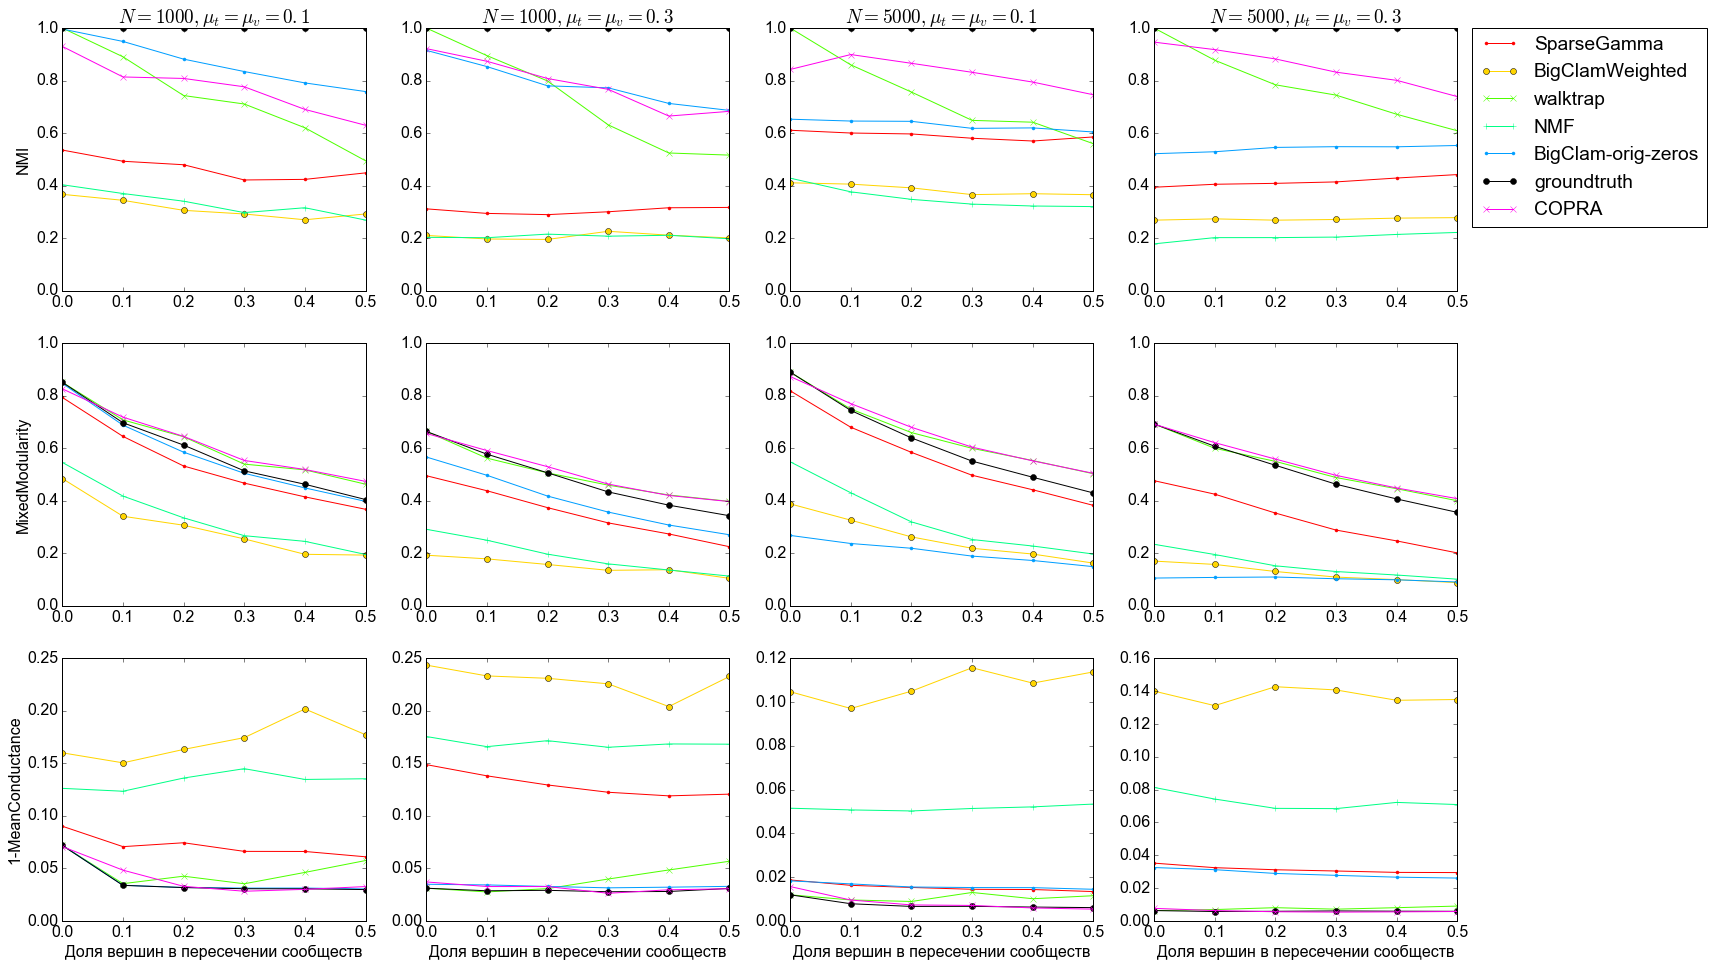

In [65]:
plt.figure(figsize=(25, 16))

data_params['N'] = 1000
data_params['mut'] = 0.1
data_params['muw'] = 0.1
draw_res('../data/dumps/models_res_full-dump-{}-{}'.format(data_params['N'], data_params['mut']))

data_params['mut'] = 0.3
data_params['muw'] = 0.3
draw_res('../data/dumps/models_res_full-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=2)

data_params['N'] = 5000
data_params['mut'] = 0.1
data_params['muw'] = 0.1
draw_res('../data/dumps/models_res_full-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=3)

data_params['mut'] = 0.3
data_params['muw'] = 0.3
draw_res('../data/dumps/models_res_full-dump-{}-{}'.format(data_params['N'], data_params['mut']), k=4, legend=True)
plt.show()